In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet_new import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_new()
loaders = get_loaders(data, 16)

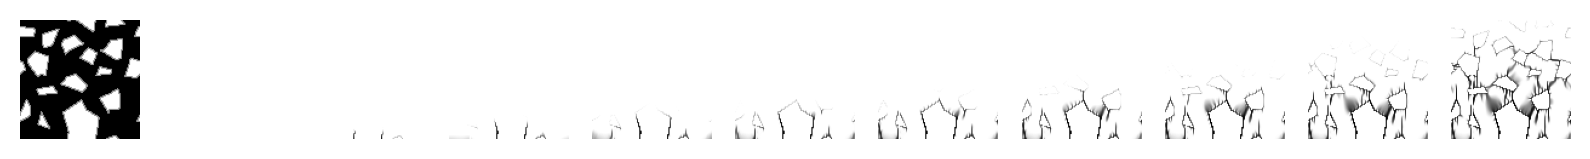

In [3]:
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [7]:
name = 'NN_library/ConvNet/ConvNet_new_norm'
args = {'lr' : 0.00001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [8]:
net = ConvNet(16)

In [16]:
torch.cuda.empty_cache() 

In [21]:
net = load_network(net, args['name']+'_49', args)

In [22]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.1404851568
Epoch: 0 batch: 100 mean train loss:  0.0857582502
Epoch: 0 batch: 200 mean train loss:  0.0853403769
Epoch: 0 batch: 300 mean train loss:  0.0911794514
Epoch: 0 batch: 400 mean train loss:  0.1301990543
Epoch: 0 batch: 500 mean train loss:  0.1034624684
Epoch: 0 batch: 600 mean train loss:  0.1209120029
Epoch: 0 batch: 700 mean train loss:  0.0885337447
Epoch: 0 mean train loss:  0.1154284290 mean val. rec. loss:  0.0999653637
Epoch: 1 batch: 0 mean train loss:  0.1025270824
Epoch: 1 batch: 100 mean train loss:  0.0932445033
Epoch: 1 batch: 200 mean train loss:  0.1362500954
Epoch: 1 batch: 300 mean train loss:  0.1600914067
Epoch: 1 batch: 400 mean train loss:  0.1042705914
Epoch: 1 batch: 500 mean train loss:  0.1094324989
Epoch: 1 batch: 600 mean train loss:  0.0903387258
Epoch: 1 batch: 700 mean train loss:  0.1287383358
Epoch: 1 mean train loss:  0.1161459290 mean val. rec. loss:  0.1147107258
Epoch: 2 batch: 0 mean train loss:  0.

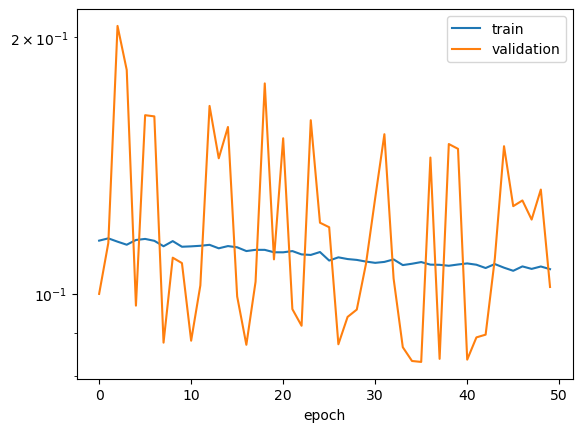

In [23]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')